<a href="https://colab.research.google.com/github/msof07/msof07/blob/main/Predicci%C3%B3n_del_clima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RETO DE APRENDIZAJE 1 - Redes Neuronales

**Objetivo: Estimar la temperatura actual de la CDMX usando regresión lineal.**

## CONTEXTO

La predicción de la temperatura depende de múltiples variables, de hecho, es de las variables más complicadas de calcular debido al número de dimensiones. Para este proyecto se usará la regresión lineal y únicamente el promedio de temperatura histórico de la Ciudad de México. El plan es el siguiente:



1.   Obtener la data hisórica de [Meteostat](https://github.com/meteostat/meteostat-python), que ofrece gratuitamente la temperatura registrada en la estación de clima del aeropuerto de la CDMX (disponibles desde el 2007)
2.   Visualizar el comportamiento y rango de temperatura durante el mes de Agosto.
3. Obtener el promedio de temperatura de este mes y crear una nueva serie de tiempo.
4. Usando sklearn se ajustará el modelo de regresión lineal a esos puntos y una vez ajustado se usarán 3 nuevos puntos a futuro para estimar la temperatura de esos años.





### Packages

In [1]:
!pip install meteostat

In [117]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime
from meteostat import Point, Daily

## Predicción

### Explorar data

In [78]:
# Especificaremos el periodo de tiempo, tomaré desde el 2008 y graficaré para ver su comportamiento en Agosto.

start = datetime(2007, 1, 1)
end = datetime(2022, 12, 30)

# Ahora specificaremos la ubicación geográfica de cdmx, de acuerdo google su latitud, longitud y elevación es la siguiente:

coord_cdmx = Point(19.4285, -99.1277)

# Obtención de la data

data = Daily(coord_cdmx, start, end)
data = data.fetch()



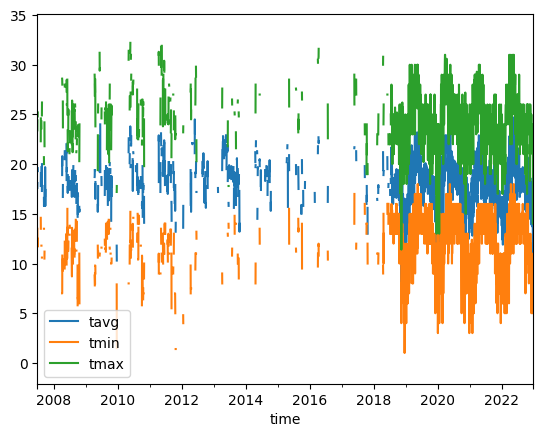

In [79]:
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [80]:
# Reorganizar las columnas (hacer el index numérico y pasar el datetimeindex como columna)

data['date'] = data.index
i = len(data)
data["num_index"] = range(0, i, 1)
data.set_index(data["num_index"],inplace=True, drop=True)
data.drop(columns="num_index",inplace=True)
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,date
num_index,,,,,,,,,,,
0,17.6,13.5,23.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-06-29
1,18.1,11.7,24.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2007-06-30
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-07-01
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-07-02
4,19.6,12.5,24.8,29.0,NaN,NaN,NaN,NaN,NaN,NaN,2007-07-03
...,...,...,...,...,...,...,...,...,...,...,...
5659,11.7,6.0,17.0,0.0,NaN,30.0,9.6,NaN,1027.8,NaN,2022-12-26
5660,13.4,8.0,19.0,0.0,NaN,359.0,8.2,NaN,1028.4,NaN,2022-12-27
5661,13.7,7.0,21.0,0.0,NaN,170.0,9.4,NaN,1026.6,NaN,2022-12-28


In [81]:
# agrupar por agosto
agosto_hist = data[pd.to_datetime(data['date']).dt.month == 8]
#agosto_hist

# promedio por año
ago_hist_avg = agosto_hist.groupby(pd.PeriodIndex(agosto_hist["date"], freq="M"))["tavg"].mean()

# desviación estándar por año
ago_hist_std = agosto_hist.groupby(pd.PeriodIndex(agosto_hist["date"], freq="M"))["tavg"].std()
#ago_hist_std

ago_hist_avg

date
2007-08    18.140000
2008-08    18.005263
2009-08    18.892857
2010-08    18.523077
2011-08    19.530769
2012-08    19.060000
2013-08    18.238462
2014-08    18.755556
2015-08    18.500000
2016-08    19.800000
2017-08    18.975000
2018-08    17.635484
2019-08    18.996774
2020-08    18.412903
2021-08    17.893548
2022-08    18.296774
Freq: M, Name: tavg, dtype: float64

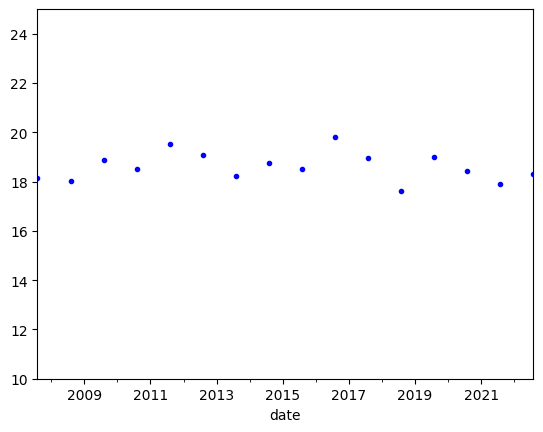

In [82]:
ago_hist_avg.plot(x="date",y="tavg", color='b', linestyle='None',marker = ".")
plt.ylim(10, 25)
plt.show()

### Ajustar el modelo lineal

In [111]:
# Checar el tipo de data y convertirlo adeacuadamente para alimentarlo al algoritmo
type(ago_hist_avg)

pandas.core.series.Series

In [148]:
x = np.array(list(range(2007, 2023))).reshape((-1, 1))
x

array([[2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022]])

In [137]:
y = ago_hist_avg.values
y

array([18.14      , 18.00526316, 18.89285714, 18.52307692, 19.53076923,
       19.06      , 18.23846154, 18.75555556, 18.5       , 19.8       ,
       18.975     , 17.63548387, 18.99677419, 18.41290323, 17.89354839,
       18.29677419])

In [122]:
model = LinearRegression()
model.fit(x,y)

0.012455152922935864

In [126]:
# El coeficiente b_0 de la ecuación
model.intercept_

46.39128880151176

In [127]:
# La pendiente o b_1 de la ecuación
model.coef_

array([-0.01379387])

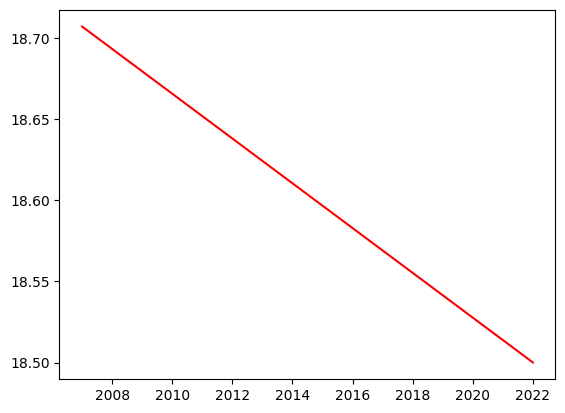

In [133]:
# Resultados del modelo

y_pred = model.predict(x)

plt.plot(x,y_pred,color='r')
plt.show()

In [130]:
# Predicción con el modelo dándole 3 nuevos elementos

x_futuro = np.array(list(range(2023, 2026))).reshape((-1, 1))

y_futuro = model.predict(x_futuro)
y_futuro

array([18.48628128, 18.47248741, 18.45869353])

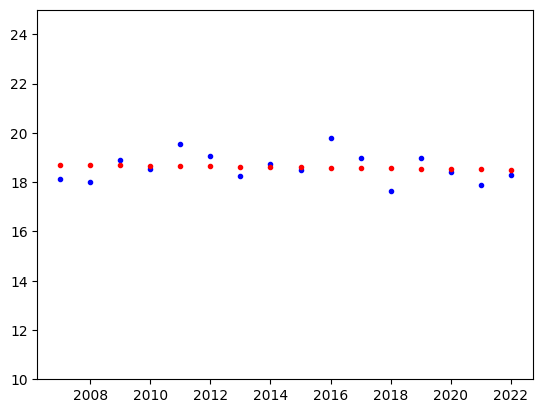

In [167]:
fig,ax = plt.subplots()

plt.plot(x, y, color='b', linestyle='None',marker = ".")
plt.plot(x, y_pred, color='r', linestyle='None',marker = ".")
plt.ylim(10, 25)

plt.show()

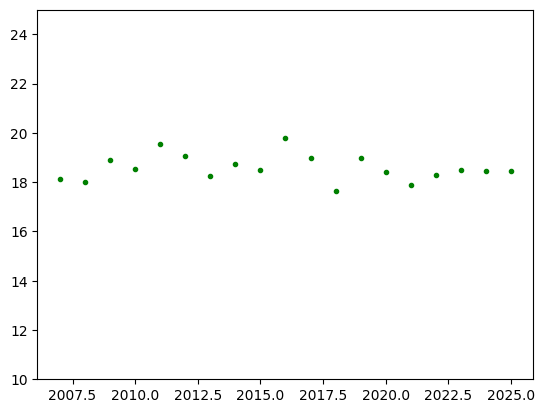

In [192]:
#Visualización con los puntos proyectados

new_x = np.array(list(range(2007, 2026))).reshape((-1, 1))
new_y = np.concatenate((y, y_futuro))

plt.plot(new_x,new_y,color='g', linestyle='None',marker = ".")

plt.ylim(10, 25)
plt.show()


# **VALOR PARA AGOSTO 2023: 18.4°**